# Toxic Comment Classification

## 0. Install Dependencies and Bring in Data

In [18]:
#tensorflow to create the sequential mode
#pandas to read the data
#matplotlib to plot the data
#sklearn to split the data
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirem

In [19]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [20]:
#read the data
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))

#check the shape of the data
df.shape

(159571, 8)

# 1. Data Exploration

In [21]:
!pip list

Package                     Version
--------------------------- ----------------
absl-py                     2.1.0
aiofiles                    23.2.1
aiohttp                     3.9.5
aiosignal                   1.3.1
albucore                    0.0.17
albumentations              1.4.18
annotated-types             0.7.0
anyio                       4.4.0
argcomplete                 3.5.1
argon2-cffi                 23.1.0
argon2-cffi-bindings        21.2.0
arrow                       1.3.0
asttokens                   2.4.1
astunparse                  1.6.3
async-lru                   2.0.4
attrs                       23.2.0
babel                       2.16.0
beautifulsoup4              4.12.3
bleach                      6.1.0
blis                        1.0.1
boto3                       1.35.58
botocore                    1.35.58
Brotli                      1.1.0
cachetools                  5.5.0
catalogue                   2.0.10
certifi                     2024.2.2
cffi               

In [22]:
#See the different columns in the data
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [23]:
#all the comments
x = df['comment_text']
print(x)


0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object


In [24]:
#Check if there are any missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [25]:
# Important libraries for Data Distribution 
import matplotlib.pyplot as plt 
import seaborn as sns


Label Counts:
toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_12312\4279871279.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


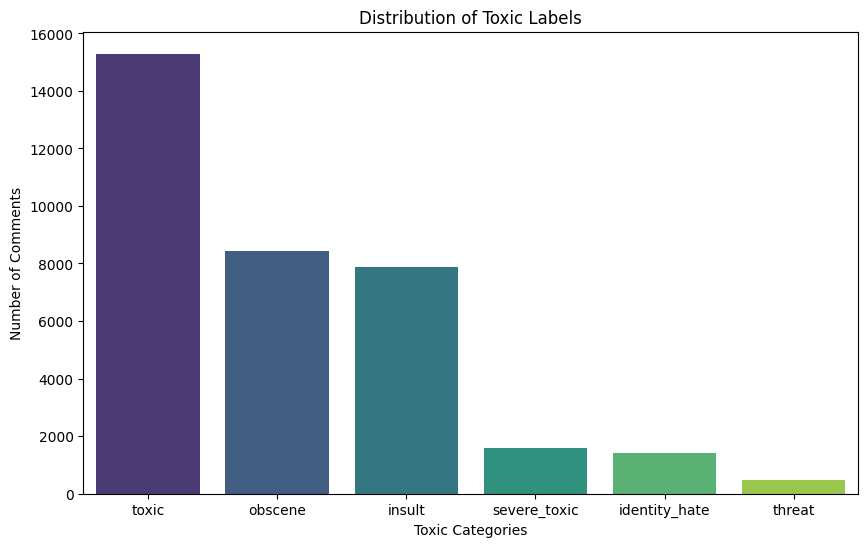

In [26]:
#Data distribution of label counts 
Label_columns = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

# Count total occurences of each label 
label_counts = df[Label_columns].sum().sort_values(ascending=False)
print("\nLabel Counts:")
print(label_counts)

# Plot the label distribution
plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Distribution of Toxic Labels")
plt.xlabel("Toxic Categories")
plt.ylabel("Number of Comments")
plt.show()

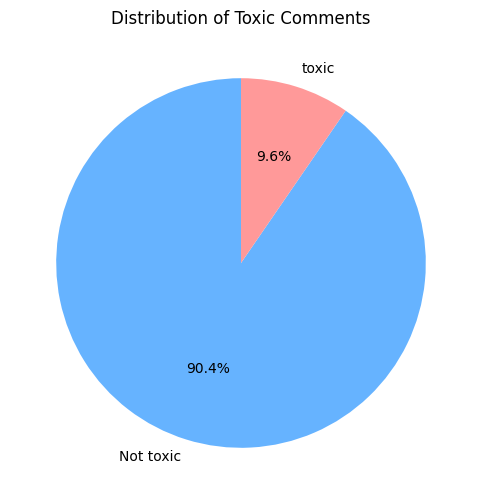

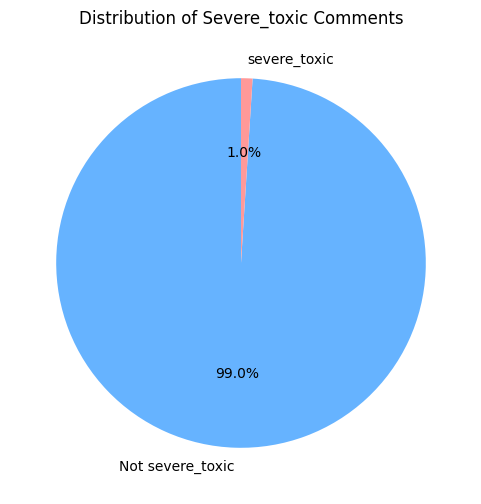

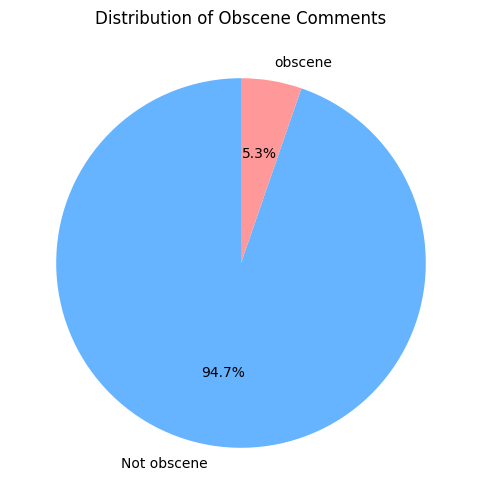

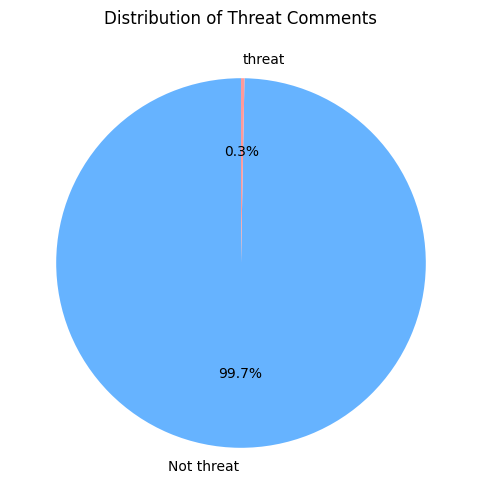

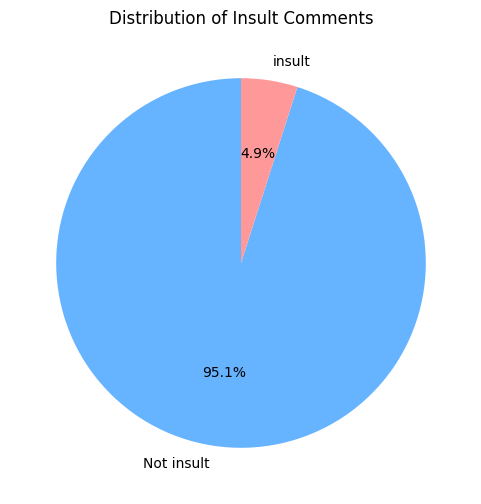

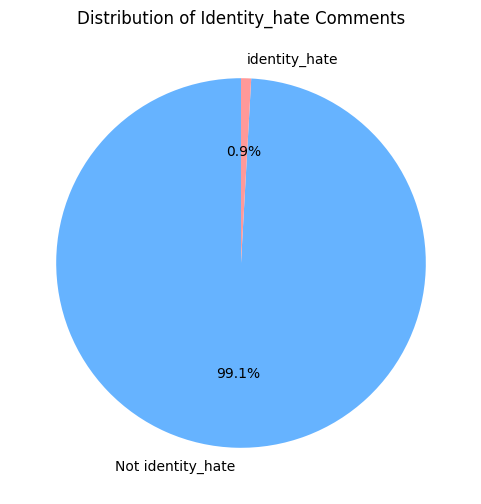

In [27]:
# Pie Chart for 
for label in Label_columns:
    plt.figure(figsize=(6, 6))
    counts = df[label].value_counts()
    labels = ['Not ' + label, label]
    plt.pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff','#ff9999']
    )
    plt.title(f'Distribution of {label.capitalize()} Comments')
    plt.show()

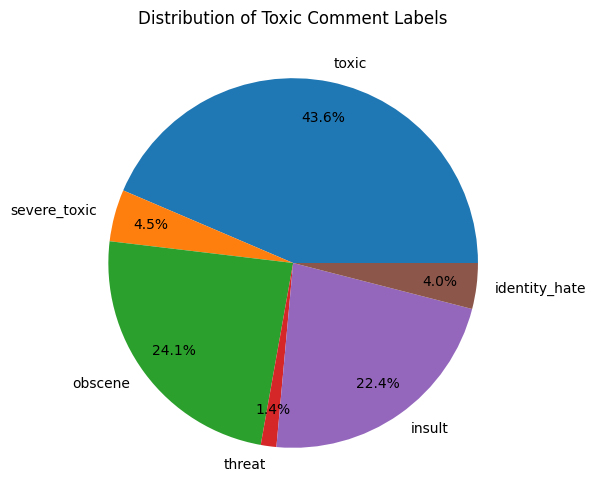

In [28]:
temp = {}
# Count number of each category of comment
for x in df.columns[2:]:
    temp[x] = df[x].sum()

# Plot the pie chart
plt.figure(figsize=(7, 6))
plt.pie(
    temp.values(),
    labels=temp.keys(), 
    autopct='%1.1f%%', 
    pctdistance=0.80
)
plt.title('Distribution of Toxic Comment Labels')
plt.show()

In [29]:
# Count of Multi-label comment 
df['Multi_labele_comment'] = df[Label_columns].sum(axis=1)

print(f"Multi label comments : {(df['Multi_labele_comment'] > 1).sum()}")

Multi label comments : 9865


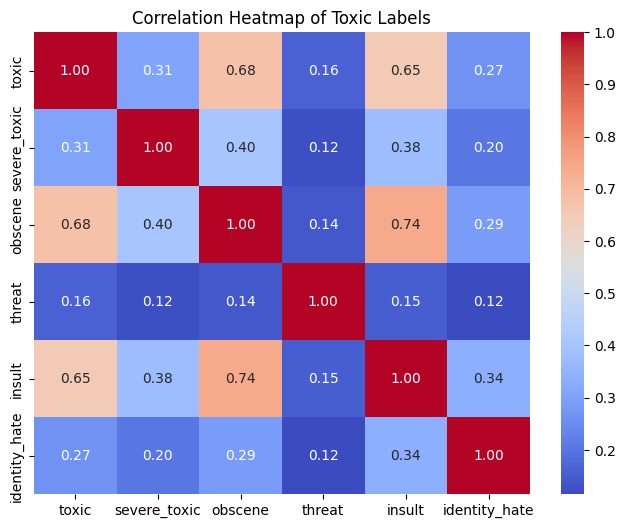

In [30]:
# Correlation heatmap for the toxic labels 
plt.figure(figsize=(8, 6))
sns.heatmap(df[Label_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Toxic Labels")
plt.show()

# Text Analysis

In [31]:
# Average comment lengths (character, words)

df['char_length'] = df['comment_text'].apply(len)
df['word_length'] = df['comment_text'].apply(lambda x: len(x.split()))

avg_char_length = df['char_length'].mean()
avg_word_length = df['word_length'].mean()

print(f"Average Comment Length (Characters): {avg_char_length:.2f}")
print(f"Average Comment Length (Words): {avg_word_length:.2f}")

Average Comment Length (Characters): 394.07
Average Comment Length (Words): 67.27


In [32]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [33]:
from wordcloud import WordCloud 

In [34]:
from wordcloud import WordCloud

def plot_wordcloud(column_name, width=720, height=520):

    if column_name not in df.columns[2:8]:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return
    
    text = ' '.join(df[df[column_name] == 1]['comment_text'])
    wordcloud_ = WordCloud(width=width, height=height, background_color='black').generate(text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {column_name} Comments')
    plt.show()

    word_frequencies = wordcloud_.words_

    # Top 20 Words used in toxic comments
    words = pd.DataFrame(word_frequencies, index=[0]).T[:20]
    words.reset_index(inplace=True)
    words.rename(columns={0:'Normalized Frequencies', 'index':'Word'}, inplace=True) 
    words['Normalized Frequencies'] = words['Normalized Frequencies'] * 100
    print(f'Top 20 words used in {column_name} comments:')
    print(words.head(10))

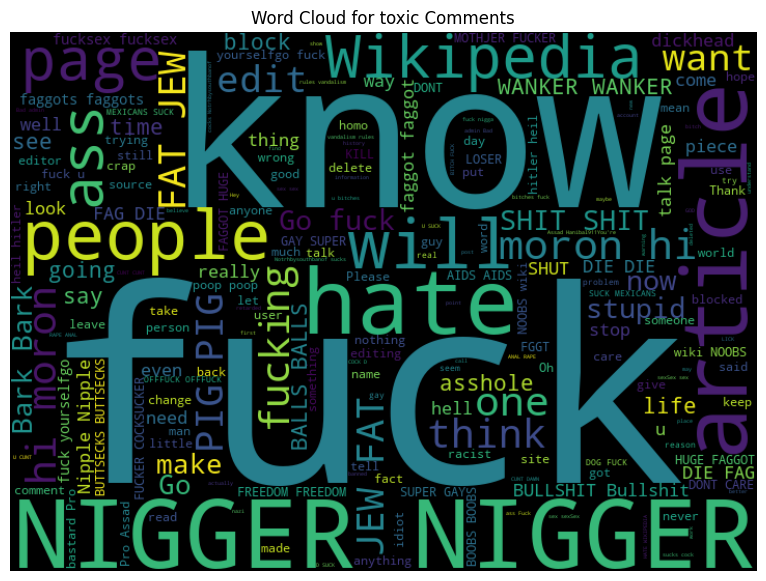

Top 20 words used in toxic comments:
            Word  Normalized Frequencies
0           fuck              100.000000
1           know               54.105534
2  NIGGER NIGGER               51.866152
3        article               46.460746
4           hate               46.332046
5         people               44.736165
6           will               44.272844
7      Wikipedia               41.956242
8           page               40.926641
9            ass               40.592021


In [35]:
plot_wordcloud("toxic")

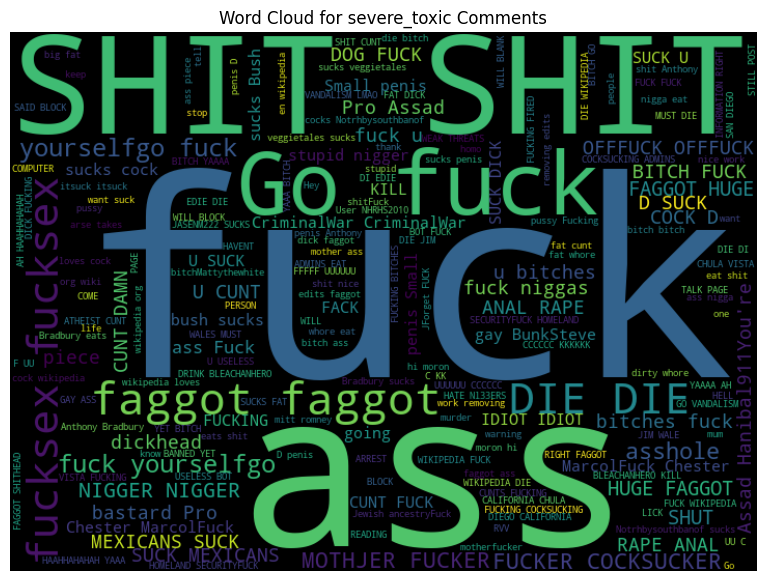

Top 20 words used in severe_toxic comments:
              Word  Normalized Frequencies
0             fuck              100.000000
1              ass               58.735632
2        SHIT SHIT               57.471264
3          Go fuck               53.045977
4    faggot faggot               40.977011
5          DIE DIE               36.321839
6  fucksex fucksex               35.804598
7  fuck yourselfgo               35.689655
8  yourselfgo fuck               35.689655
9          asshole               30.172414


In [36]:
plot_wordcloud("severe_toxic")

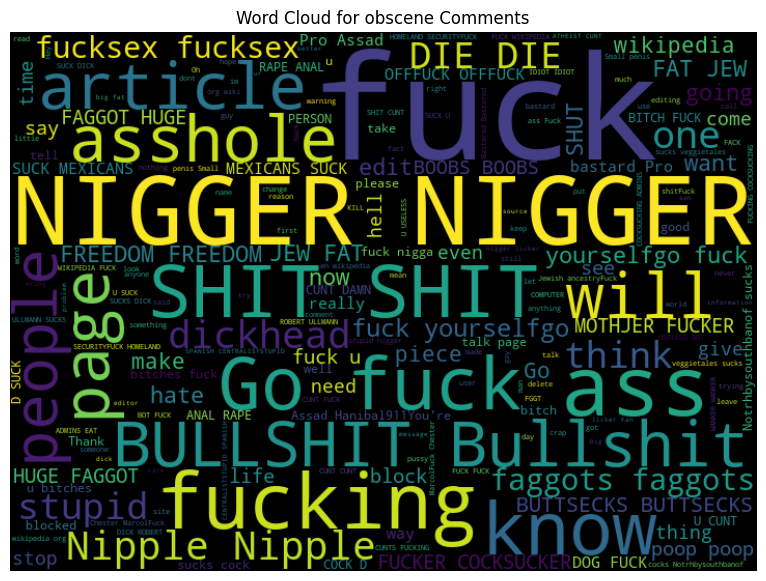

Top 20 words used in obscene comments:
            Word  Normalized Frequencies
0           fuck              100.000000
1  NIGGER NIGGER               60.601504
2            ass               44.751880
3        fucking               38.045113
4      SHIT SHIT               34.436090
5           know               34.225564
6        Go fuck               33.744361
7        asshole               26.165414
8        article               25.954887
9           page               25.413534


In [37]:
plot_wordcloud("obscene")

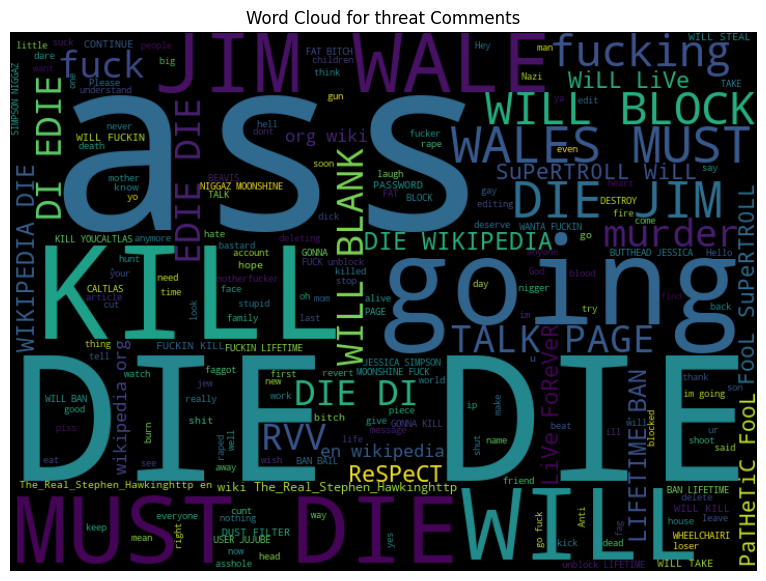

Top 20 words used in threat comments:
         Word  Normalized Frequencies
0         ass              100.000000
1     DIE DIE               82.942708
2        KILL               39.973958
3       going               36.458333
4        WILL               23.697917
5    MUST DIE               20.833333
6    JIM WALE               20.572917
7  WALES MUST               20.312500
8     DIE JIM               20.312500
9  WILL BLOCK               19.401042


In [38]:
plot_wordcloud("threat")

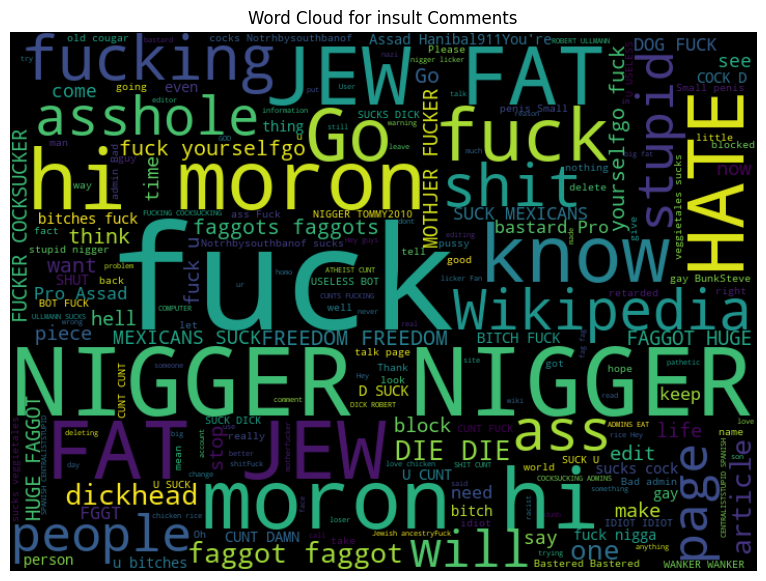

Top 20 words used in insult comments:
            Word  Normalized Frequencies
0           fuck              100.000000
1  NIGGER NIGGER               66.888715
2       moron hi               49.882445
3       hi moron               49.764890
4        JEW FAT               48.354232
5        FAT JEW               48.040752
6           know               44.083072
7           HATE               43.377743
8        Go fuck               42.985893
9        fucking               40.948276


In [39]:
plot_wordcloud("insult")

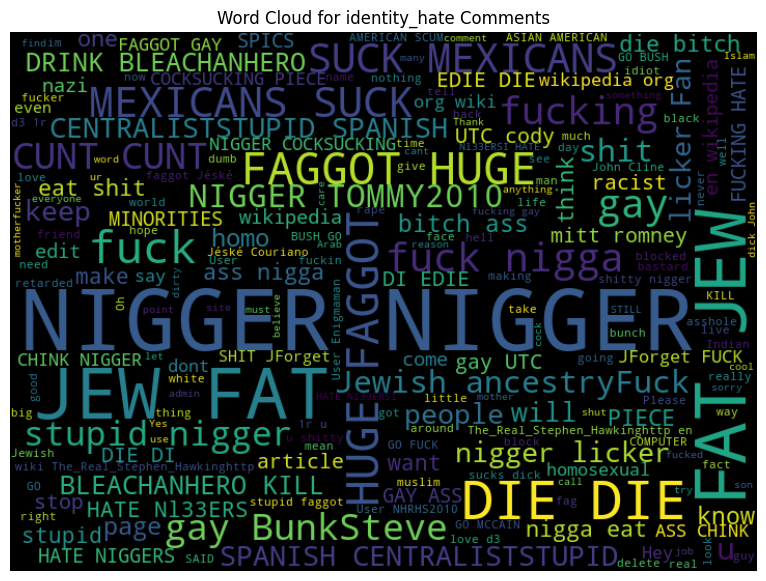

Top 20 words used in identity_hate comments:
            Word  Normalized Frequencies
0  NIGGER NIGGER              100.000000
1        JEW FAT               64.913204
2        FAT JEW               64.492372
3        DIE DIE               33.350868
4    HUGE FAGGOT               22.041031
5    FAGGOT HUGE               21.883219
6           fuck               21.725408
7  MEXICANS SUCK               18.726986
8  SUCK MEXICANS               18.674382
9     fuck nigga               17.727512


In [40]:
plot_wordcloud("identity_hate")

# Text processing

In [41]:
# Important libraries 
import re
from nltk.corpus import stopwords 
import nltk 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# Define the stopwords list 
stop_words = set(stopwords.words('english'))

# Function to clean the text
def clean_text(text):
    # Remove special characters and punctuation using regex 
    text = re.sub(r'[^a-zA-Z\s]','',text)
    # Convert text to lowercase 
    text =  text.lower()
    # Tokenize and remove stopwords 
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Join words back into a single string 
    return ' '.join(words)

# Apply the cleaning fucntion to the comment_text column 
df['cleaned_comment_text'] = df['comment_text'].apply(clean_text)

# Display a sample of the cleaned text 
print("Original Text:")

print(df['comment_text'].iloc[0])
print("\nCleaned Text:")
print(df['cleaned_comment_text'].iloc[0])

Original Text:
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

Cleaned Text:
explanation edits made username hardcore metallica fan reverted werent vandalisms closure gas voted new york dolls fac please dont remove template talk page since im retired


In [43]:
# The dataset with the new column 'cleaned commen text' which are toxic comments
df[df['toxic']== 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Multi_labele_comment,char_length,word_length,cleaned_comment_text
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4,44,8,cocksucker piss around work
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,1,319,53,hey talk exclusive group wp talibanswho good d...
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,1,57,10,bye dont look come think comming back tosser
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,4,648,117,gay antisemmitian archangel white tiger meow g...
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,3,40,8,fuck filthy mother ass dry
...,...,...,...,...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1,4,1677,319,previous conversation fucking shit eating libe...
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0,2,33,6,mischievious pubic hair
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0,3,346,58,absurd edits absurd edits great white shark to...
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0,2,534,103,hey listen dont ever delete edits ever im anno...


In [44]:
# Analyze unique words in each toxicity category 
# Important libraries
from collections import Counter

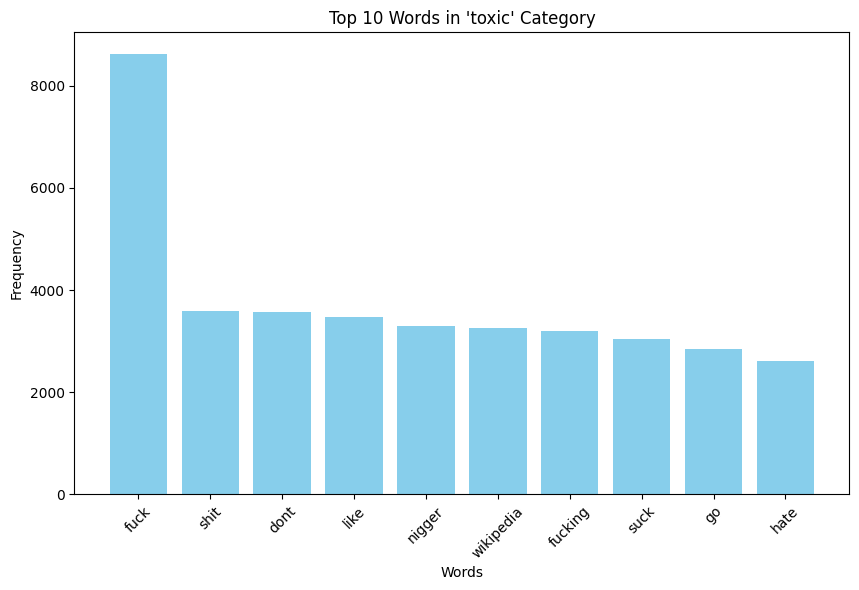

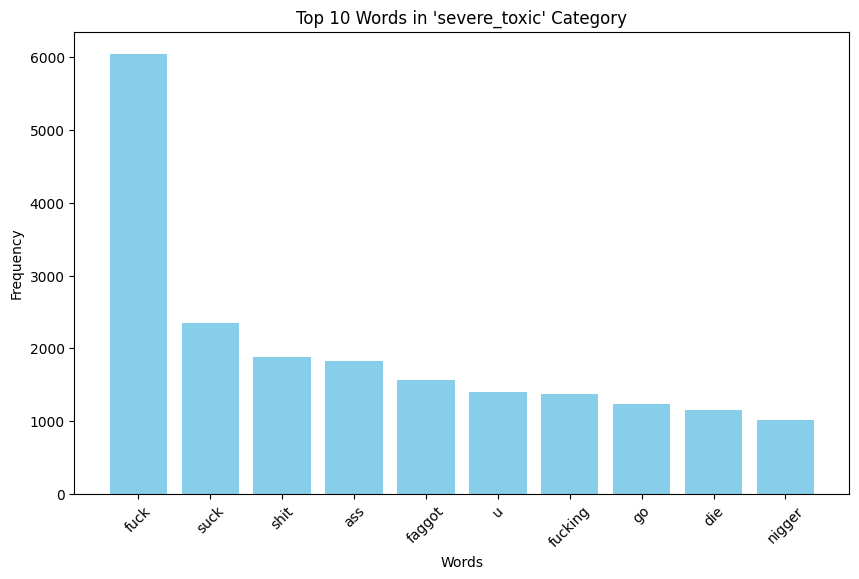

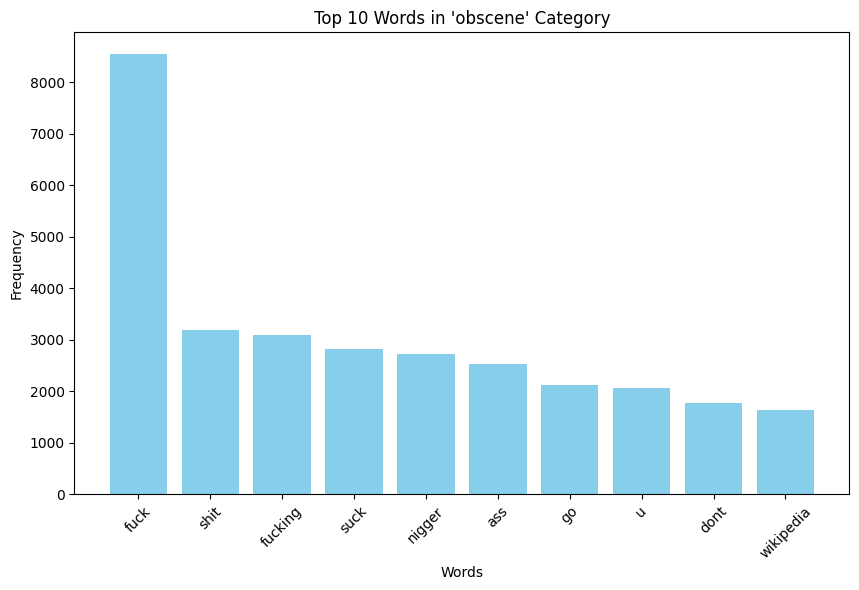

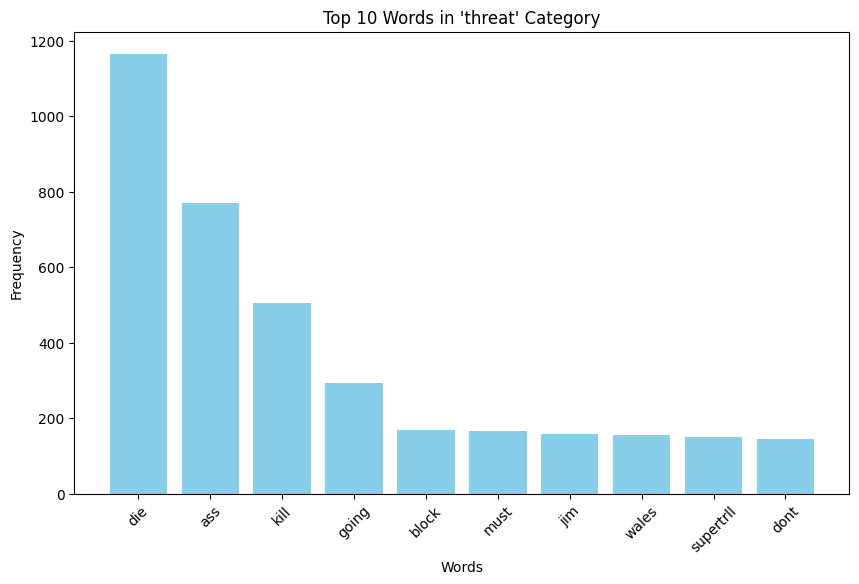

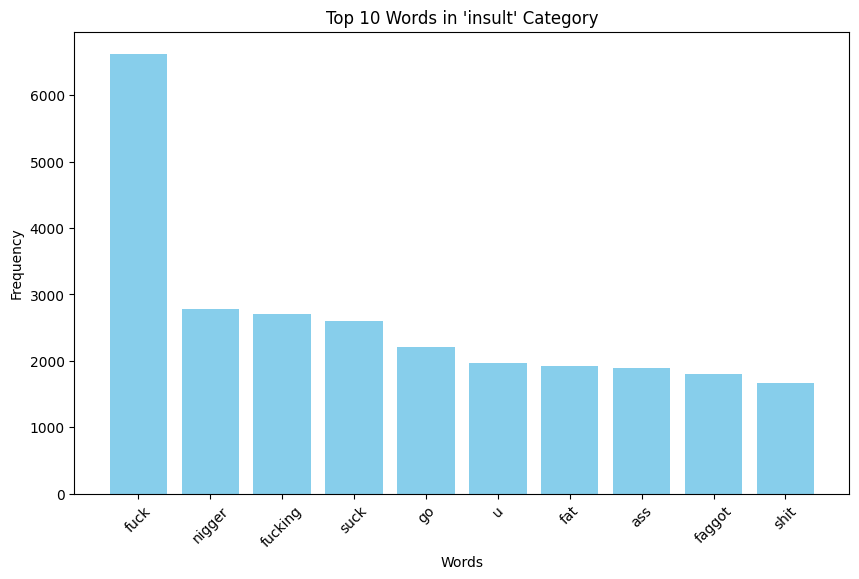

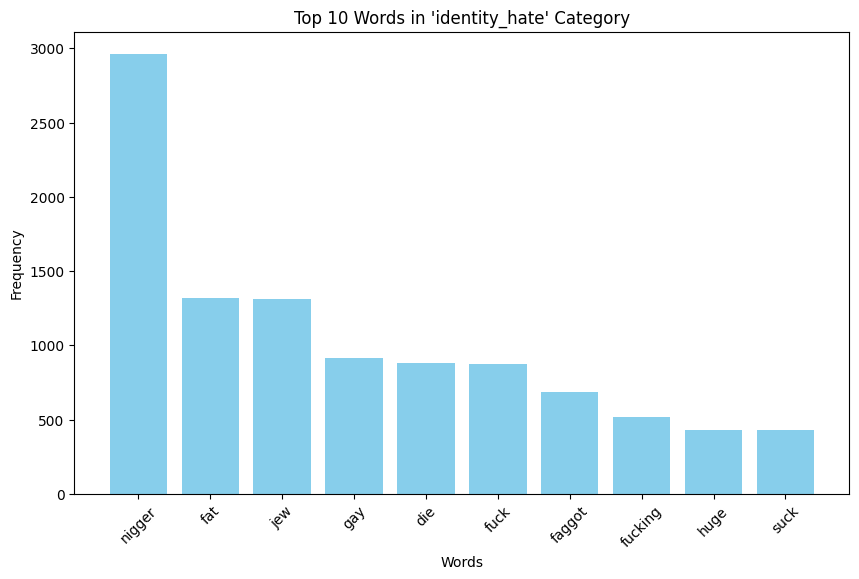

In [45]:
# Function to get unique words from comments in a specific category
def get_unique_words(comments):
    # Split all comments into words
    all_words = " ".join(comments).split()
    # Count the frequency of each word
    return Counter(all_words)  

# Analyze unique words in each toxicity category
unique_words_per_category = {} 

for label in Label_columns:
    # Filter comments for the label
    category_comments = df[df[label] == 1]['cleaned_comment_text']  
    word_counts = get_unique_words(category_comments)
    # Ensure the variable name is consistent
    unique_words_per_category[label] = word_counts 

# Display and visualize the top 10 unique words for each category
for label, word_counts in unique_words_per_category.items():
    # Check if there are enough words in the category
    if len(word_counts) > 0:
        # Get the top 10 words and their counts
        top_words = word_counts.most_common(10)
        # Unpack into separate lists for words and counts
        words, counts = zip(*top_words) 
        
        # Plot the bar chart
        plt.figure(figsize=(10, 6))
        plt.bar(words, counts, color='skyblue')
        plt.title(f"Top 10 Words in '{label}' Category")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"No words available for category: {label}")

In [46]:
# important library 
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer 
tfidf = TfidfVectorizer(max_features=10000)

# Convert text data to numerical TF-IDF features 
X = tfidf.fit_transform(df['cleaned_comment_text'])

# Check the shape of the TF-IDF matrix 
print(f"TF-IDF Matrix Shape: {X.shape}")

TF-IDF Matrix Shape: (159571, 10000)


In [47]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [48]:
# Import libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb 

import joblib
from sklearn.model_selection import GridSearchCV

# Dictionary to store all models
models = {}

for label in Label_columns:
    print(f"\nTraining model for {label}...\n")

    # Prepare the target
    y = df[label]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Train the XGBoost model
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        max_depth=6,
        learning_rate=0.1,
        n_estimators=100,
        random_state=42
    )

    model.fit(X_train, y_train)

    # Save the model in the dictionary
    models[label] = model

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"Classification Report for {label}:")
    print(classification_report(y_test, y_pred))
    #accuracy score, precision, recall, f1-score
    accuracy = (y_pred == y_test).mean()
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision']:.4f}")
    print(f"Recall: {classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall']:.4f}")
    print(f"F1-Score: {classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']:.4f}")


# Save all models to a file
joblib.dump(models, "all_xgboost_models.joblib")
print("All models saved to all_xgboost_models.joblib.")



Training model for toxic...



c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:37:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for toxic:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     28856
           1       0.94      0.46      0.62      3059

    accuracy                           0.95     31915
   macro avg       0.94      0.73      0.80     31915
weighted avg       0.95      0.95      0.94     31915

Accuracy: 0.9458
Precision: 0.9455
Recall: 0.9458
F1-Score: 0.9373

Training model for severe_toxic...



c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:38:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for severe_toxic:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31596
           1       0.54      0.17      0.25       319

    accuracy                           0.99     31915
   macro avg       0.77      0.58      0.62     31915
weighted avg       0.99      0.99      0.99     31915

Accuracy: 0.9903
Precision: 0.9871
Recall: 0.9903
F1-Score: 0.9877

Training model for obscene...



c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:39:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for obscene:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30225
           1       0.90      0.64      0.75      1690

    accuracy                           0.98     31915
   macro avg       0.94      0.82      0.87     31915
weighted avg       0.98      0.98      0.98     31915

Accuracy: 0.9772
Precision: 0.9760
Recall: 0.9772
F1-Score: 0.9754

Training model for threat...



c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:40:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for threat:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31819
           1       0.48      0.15      0.22        96

    accuracy                           1.00     31915
   macro avg       0.74      0.57      0.61     31915
weighted avg       1.00      1.00      1.00     31915

Accuracy: 0.9970
Precision: 0.9959
Recall: 0.9970
F1-Score: 0.9961

Training model for insult...



c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for insult:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30340
           1       0.79      0.47      0.59      1575

    accuracy                           0.97     31915
   macro avg       0.88      0.73      0.79     31915
weighted avg       0.96      0.97      0.96     31915

Accuracy: 0.9679
Precision: 0.9643
Recall: 0.9679
F1-Score: 0.9639

Training model for identity_hate...



c:\Users\CYTech Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:42:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for identity_hate:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31634
           1       0.75      0.17      0.27       281

    accuracy                           0.99     31915
   macro avg       0.87      0.58      0.63     31915
weighted avg       0.99      0.99      0.99     31915

Accuracy: 0.9922
Precision: 0.9905
Recall: 0.9922
F1-Score: 0.9897
All models saved to all_xgboost_models.joblib.


In [51]:
import joblib
import gradio as gr

# Load the saved models
models = joblib.load("all_xgboost_models.joblib")

In [52]:
# Predict the toxicity levels for a single comment
def preprocess_comment(comment):
    return tfidf.transform([comment])  # Use the tfidf vectorizer defined earlier

def predict_toxicity(comment):
    # Preprocess the comment
    comment_features = preprocess_comment(comment)
    
    # Dictionary to store predictions
    predictions = {}
    
    # Iterate over all models and predict
    for label, model in models.items():
        predictions[label] = model.predict(comment_features)[0]  # Get binary output (0 or 1)
    
    return predictions

# Function to score the comment and generate HTML output
def score_comment(comment):
    predictions = predict_toxicity(comment)
    
    text = '<div style="font-family: monospace;">'  # Start with HTML container
    for label, prediction in predictions.items():
        # Map the score to a red gradient (from light red to dark red)
        intensity = int(min(max(prediction * 255, 0), 255))  # Scale to 0-255
        red_color = f"rgb({intensity}, 0, 0)"  # RGB color for inline styling
        text += f'<span style="color: {red_color};">{label}: {prediction}</span><br>'
    text += '</div>'  # Close the HTML container

    return text

# Define a custom theme
custom_theme = gr.themes.Default(
    primary_hue="gray",        # Primary color for buttons and highlights
    secondary_hue="blue",       # Secondary color for accents
    neutral_hue="lime",          # Neutral color for backgrounds
    font="Roboto",
)

interface = gr.Interface(
    fn=score_comment,
    inputs=gr.Textbox(lines=2, placeholder="Comment to score", label="Enter your Comment"),
    outputs=gr.HTML(label="Toxicity Detection Results"),
    title="Toxic Comment Classification",
    description="Test the type of toxicity detected in your comment.",
    theme=custom_theme
)

In [53]:
interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
